# Summary Statistics for Wumph Dataset

Wumph pits exported on 2/19/25

* Number of pits
* Number of layers
* Number of layers with Grain Form
* Number of layers with Grain Size
* Number of pits with Density Profile
* Number of density measurements
* Number of pits with Temp Profile
* Number of temp measurements
* Number of ECT Results
* Number of CT Results
* Number of PST Results
* Number of RBT Results
* Whumpf data summary

In [40]:
# Import libraries
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
from caaml_parser import caaml_parser

In [41]:
# Load and parse xml files
folder_path = "snowpits/wumph_pits" # wumph data set pits exported on 2/19/25

# Create a list of all CAAML files in the folder
caaml_files = [f for f in os.listdir(folder_path) if f.endswith('.xml')] # List of all CAAML files in the folder

In [42]:

# Parse all pits and summarize available info
pitList=[]
pitDict={}

for file in caaml_files:
    file_path = folder_path + '/' + file
    pit = caaml_parser(file_path)

    numPrimaryGrainForm = 0;
    numPrimaryGrainSize = 0;
    for layer in pit.snowProfile.layers:
        if layer.grainFormPrimary is not None:
            numPrimaryGrainForm += 1
            if layer.grainFormPrimary.grainSizeAvg is not None:
                numPrimaryGrainSize += 1

    pitDict = {
        'PitID': pit.pitID,
        'Operation Name': pit.user['OperationName'],
        'SnowPilot Username': pit.user['Username'],
        'num Layers': len(pit.snowProfile.layers),
        'num Layers wPrimary Grain Form': numPrimaryGrainForm,
        'num Layers wPrimary Grain Size': numPrimaryGrainSize,
        'tempMeasurements': len(pit.snowProfile.tempProfile) if pit.snowProfile.tempProfile != None else 0,
        'densityMeasurements': len(pit.snowProfile.densityProfile) if pit.snowProfile.densityProfile != None else 0,
        'ECT_qty': len(pit.stabilityTests.ECT),
        'CT_qty': len(pit.stabilityTests.CT),
        'PST_qty': len(pit.stabilityTests.PST),
        'RBT_qty': len(pit.stabilityTests.RBT),
        'whumpfCracking': pit.wumphData.wumphCracking,
        'whumpfNoCracking': pit.wumphData.wumphNoCracking,
        'crackingNoWhumpf': pit.wumphData.crackingNoWhumpf,
        'whumpfNearPit': pit.wumphData.whumpfNearPit,
        'whumpfDepthWeakLayer': pit.wumphData.whumpfDepthWeakLayer,
        'whumpfTriggeredRemoteAva': pit.wumphData.whumpfTriggeredRemoteAva,
        'whumpfSize': pit.wumphData.whumpfSize
    }
    pitList.append(pitDict)

df = pd.DataFrame(pitList)

#df.to_csv('wumph-dataset-summary.csv', index=False)

In [43]:
# Print dataframe
print(df.to_string(index=False, max_rows=10))

PitID                        Operation Name SnowPilot Username  num Layers  num Layers wPrimary Grain Form  num Layers wPrimary Grain Size  tempMeasurements  densityMeasurements  ECT_qty  CT_qty  PST_qty  RBT_qty whumpfCracking whumpfNoCracking crackingNoWhumpf whumpfNearPit whumpfDepthWeakLayer whumpfTriggeredRemoteAva      whumpfSize
25670 Colorado Avalanche Information Center      Ron.Simenhois           6                               6                               6                 0                    0        1       0        0        0           true            false            false          true                 true                    false            None
25671 Colorado Avalanche Information Center      Ron.Simenhois           4                               4                               4                 0                    0        1       0        0        0           true            false            false          true                 true                    false   

In [44]:
summary_info = {
    'Pits': int(df['PitID'].count()),
    'Layers': int(df['num Layers'].sum()),
    'Layers wPrimary Grain Form': int(df['num Layers wPrimary Grain Form'].sum()),
    'Layers wPrimary Grain Size': int(df['num Layers wPrimary Grain Size'].sum()),
    'Pits with Density Info': int((df['densityMeasurements']!=0).sum()),
    'Density Measurements': int(df['densityMeasurements'].sum()),
    'Pits with Temp Info': int((df['tempMeasurements']!=0).sum()),
    'Temp Measurements': int(df['tempMeasurements'].sum()),
    'ECT Results': int(df['ECT_qty'].sum()),
    'CT Results': int(df['CT_qty'].sum()),
    'PST Results': int(df['PST_qty'].sum()),
    'RBT Results': int(df['RBT_qty'].sum()),
    'Pits where wumpfCracking = true': int((df['whumpfCracking']=='true').sum()),
    'Pits where whumpfNoCracking = true': int((df['whumpfNoCracking']=='true').sum()),
    'Pits where crackingNoWhumpf = true': int((df['crackingNoWhumpf']=='true').sum()),
    'Pits where whumpfNearPit = true': int((df['whumpfNearPit']=='true').sum()),
    'Pits where whumpfDepthWeakLayer = true': int((df['whumpfDepthWeakLayer']=='true').sum()),
    'Pits where whumpfTriggeredRemoteAva = true': int((df['whumpfTriggeredRemoteAva']=='true').sum()),
    'Pits where whumpfSize is specified': int((df['whumpfSize'] != None).sum())
}

for key,value in summary_info.items():
    print(key + ": " + str(value))

Pits: 306
Layers: 1903
Layers wPrimary Grain Form: 1840
Layers wPrimary Grain Size: 1143
Pits with Density Info: 7
Density Measurements: 31
Pits with Temp Info: 27
Temp Measurements: 218
ECT Results: 418
CT Results: 78
PST Results: 81
RBT Results: 1
Pits where wumpfCracking = true: 179
Pits where whumpfNoCracking = true: 105
Pits where crackingNoWhumpf = true: 24
Pits where whumpfNearPit = true: 235
Pits where whumpfDepthWeakLayer = true: 150
Pits where whumpfTriggeredRemoteAva = true: 21
Pits where whumpfSize is specified: 306


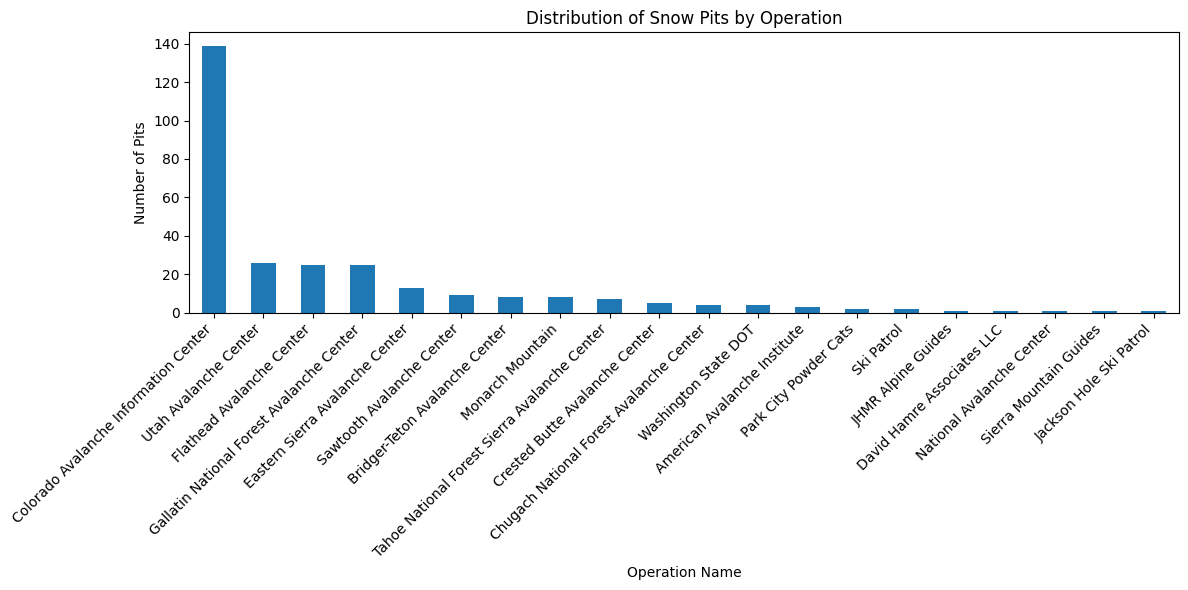

Summary of Snow Pits by Operation:
----------------------------------
Total number of Operations: 20
Total number of Professional Pits: 285

Breakdown by Operation:
                                               count
Operation Name                                      
Colorado Avalanche Information Center            139
Utah Avalanche Center                             26
Flathead Avalanche Center                         25
Gallatin National Forest Avalanche Center         25
Eastern Sierra Avalanche Center                   13
Sawtooth Avalanche Center                          9
Bridger-Teton Avalanche Center                     8
Monarch Mountain                                   8
Tahoe National Forest Sierra Avalanche Center      7
Crested Butte Avalanche Center                     5
Chugach National Forest Avalanche Center           4
Washington State DOT                               4
American Avalanche Institute                       3
Park City Powder Cats                   

In [45]:
# Create histogram of pits by Operation 
plt.figure(figsize=(12, 6))
df['Operation Name'].value_counts().plot(kind='bar')
plt.title('Distribution of Snow Pits by Operation')
plt.xlabel('Operation Name')
plt.ylabel('Number of Pits')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjusts layout to prevent label cutoff
plt.show()

# Create summary table
operation_counts = df['Operation Name'].value_counts()
print("Summary of Snow Pits by Operation:")
print("----------------------------------")
print(f"Total number of Operations: {len(operation_counts)}")
print(f"Total number of Professional Pits: {operation_counts.sum()}")
print("\nBreakdown by Operation:")
print(operation_counts.to_frame().rename(columns={'Operation Name': 'Number of Pits'}))


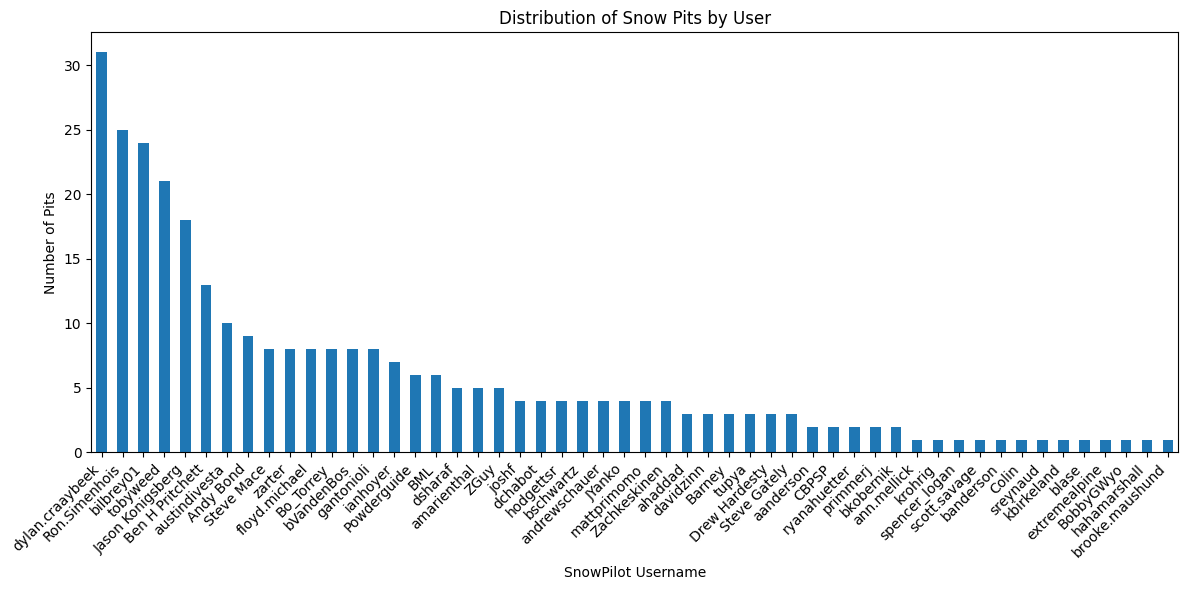

Summary of Snow Pits by Individual:
----------------------------------
Total number of Individual Users: 52
Total number of pits: 306

Breakdown by Individual:
                    count
SnowPilot Username       
dylan.craaybeek        31
Ron.Simenhois          25
bilbrey01              24
tobyweed               21
Jason Konigsberg       18
Ben H Pritchett        13
austindivesta          10
Andy Bond               9
Steve Mace              8
zarter                  8
floyd.michael           8
Bo_Torrey               8
bVandenBos              8
gantonioli              8
ianhoyer                7
Powderguide             6
BML                     6
dsharaf                 5
amarienthal             5
ZGuy                    5
joshf                   4
dchabot                 4
hodgettsr               4
bschwartz               4
andrewschauer           4
JYanko                  4
mattprimomo             4
Zachkeskinen            4
ahaddad                 3
davidzinn               3
Barney  

In [46]:
# Create histogram of pits by User
plt.figure(figsize=(12, 6))
df['SnowPilot Username'].value_counts().plot(kind='bar')
plt.title('Distribution of Snow Pits by User')
plt.xlabel('SnowPilot Username')
plt.ylabel('Number of Pits')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjusts layout to prevent label cutoff
plt.show()

# Create summary table
operation_counts = df['SnowPilot Username'].value_counts()
print("Summary of Snow Pits by Individual:")
print("----------------------------------")
print(f"Total number of Individual Users: {len(operation_counts)}")
print(f"Total number of pits: {operation_counts.sum()}")
print("\nBreakdown by Individual:")
print(operation_counts.to_frame().rename(columns={'SnowPilot Username:': 'Number of Pits'}))

In [47]:
# Print example pit
pit1 = caaml_parser(folder_path + '/' + caaml_files[0])
print(pit1)

SnowPit: 
 caamlVersion: {http://caaml.org/Schemas/SnowProfileIACS/v6.0.3} 
 pitID: 25670 
 Date: 2020-11-12 
 User:
    OperationID: SnowPilot-Group-181
    OperationName: Colorado Avalanche Information Center
    Professional: True
    ContactPersonID: SnowPilot-User-3817
    Username: Ron.Simenhois
 Location:
    Latitude: None
    Longitude: None
    Elevation: ['3642', 'm']
    Aspect: ['SW', None]
    SlopeAngle: ['25', 'deg']
    Country: US
    Region: CO
 Snow Profile: 
    measurementDirection: top down
    profileDepth: [79.0, 'cm']
    weatherConditions: 
	 skyCond: SCT
	 precipTI: Nil
	 airTempPres: [-9.5, 'degC']
	 windSpeed: M
	 windDir: SW
    hS: [79.0, 'cm']
    surfCond: 
	 windLoading: previous
	 penetrationFoot: None
	 penetrationSki: [20.0, 'cm']
    Layers:
    Layer 1: 
	 depthTop: ['0', 'cm']
	 thickness: ['19', 'cm']
	 hardness: F+
	 hardnessTop: None
	 hardnessBottom: None
	 grainFormPrimary: 
		 grainForm: PP
		 grainSizeAvg: [1.5, 'mm']
		 grainSizeMax: Non